In [1]:
from src.loader import modelLoader
import cv2
import numpy as np

loader = modelLoader('3A_ref')
loader.cuda()
model = loader.model

In [2]:
from src.loader import sampler
s = sampler('bulkice')

# 總結
- 梯度對特徵提取效果不理想
- laplace對邊的提取極好
- laplace $k=5$ 有效將邊粗化 $k=3$ 有效將點提取

In [3]:
load = s[0]
last = []
img1 = load['image'][18]
lp3 = cv2.Laplacian(img1,cv2.CV_16S,ksize=3)
lp3 = cv2.convertScaleAbs(lp3)
lp5 = cv2.Laplacian(img1,cv2.CV_16S,ksize=5)
lp5 = cv2.convertScaleAbs(lp5)
see = np.concatenate((img1, lp3, lp5),axis=1)
see = cv2.resize(see, (1600,400))
last.append(see)
last = np.concatenate(last,axis=0)

# sampler
- s[n]: dict {'image': np.ndarray, 'info': dict, 'position': dict {"O":np.ndarray (n * 3), "H": np.ndarray (n * 3)} }
- 'info': dict {'scale', 'lattice', 'ele_num', 'ele_name', 'comment'}

In [4]:
img2 = cv2.resize(img1,(256,256))

layer[14] -> O-up
layer[17:20] -> H-up, limit = 0, nodenoise
O-up ~ 2 H-up and H-bond

[findpeaks] >Finding peaks in 2d-array using topology method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using topology method with limit at 25.
[findpeaks] >Detect peaks using topology method with limit at 25.
[findpeaks] >Fin.
[findpeaks] >Finding peaks in 2d-array using topology method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using topology method with limit at 25.
[findpeaks] >Detect peaks using topology method with limit at 25.
[findpeaks] >Fin.
[findpeaks] >Finding peaks in 2d-array using topology method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using topology method with limit at 25.
[findpe

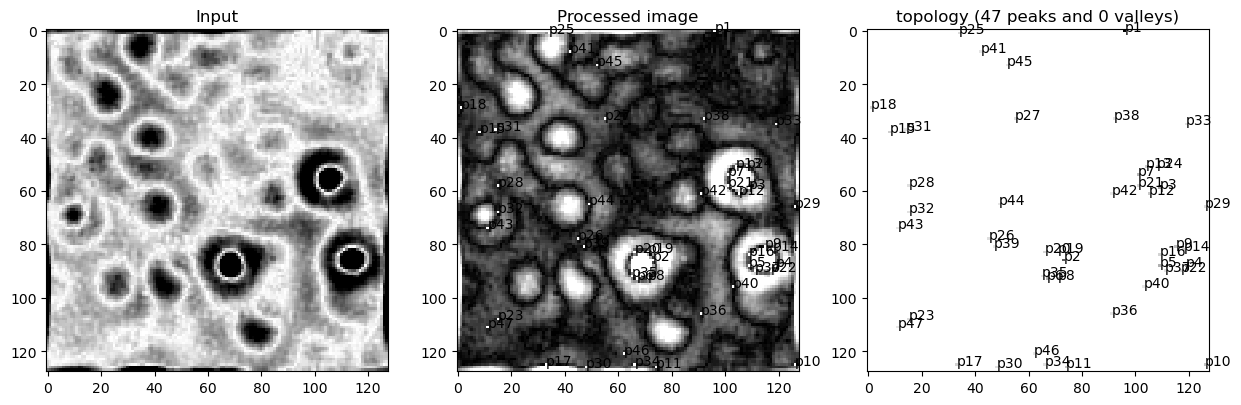

(<AxesSubplot: title={'center': 'Input'}>,
 <AxesSubplot: title={'center': 'Processed image'}>,
 <AxesSubplot: title={'center': 'topology (47 peaks and 0 valleys)'}>)

In [22]:
from findpeaks import findpeaks
from src.tools import imgsPeak
fpimg = cv2.cvtColor(load['image'][17], cv2.COLOR_BGR2GRAY)
hupimg = 255 - fpimg
fp = findpeaks(method='topology', togray=True,limit = 25, interpolate=2)
lp5l = []
for i in range(17,20):
    a = cv2.Laplacian(load['image'][i],cv2.CV_16S,ksize=5)
    a = cv2.convertScaleAbs(a)
    lp5l.append(a)
r = imgsPeak(lp5l, fp, inverse=False, cluster_threshold = 5, border=3)
fp.plot()

In [20]:
from src.graph import Graph
import matplotlib.pyplot as plt
from src.tools import drawFindPeaksResult, arrayReshape

g = Graph(load['info'])
g.addAtoms("O", load['position']['O'] @ load['info']['lattice'])
g.addAtoms("H", load['position']['H'] @ load['info']['lattice'])
nodes = g.getAtomsElem()
g.link_nodes_by_bounds(nodes['O'],nodes['O'])
g.link_nodes_by_bounds(nodes['O'],nodes['H'])

k = g.plotAtoms(lp5)
hup_pos = arrayReshape(r[...,:2], img1.shape[:2], np.diag(g.lattice)[:2])
k = drawFindPeaksResult(k, r)

[25. 25.] (128, 128)


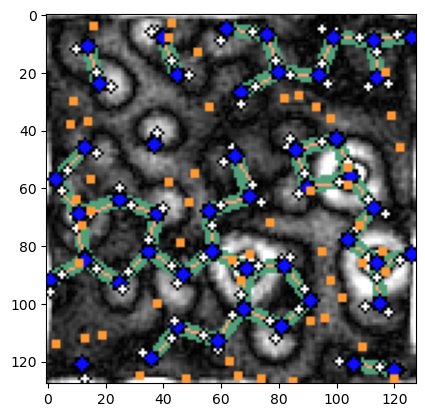

In [21]:
imgplot = plt.imshow(k)
plt.show()

In [8]:
from src.tools import dist
dist(np.asarray([1,1,1]),np.asarray([0,0,0]))



1.7320508075688772

In [9]:
hup_pos

array([[21.77734375, 18.9453125],
       [18.5546875, 10.7421875],
       [8.203125, 18.359375],
       [6.770833333333333, 1.1067708333333335],
       [4.231770833333334, 4.296875],
       [7.552083333333333, 12.955729166666666],
       [6.8359375, 24.8046875],
       [3.9713541666666665, 10.9375],
       [7.356770833333333, 7.682291666666667],
       [15.4296875, 16.6015625],
       [20.99609375, 2.5390625],
       [11.5234375, 2.083333333333333],
       [2.018229166666667, 24.8046875],
       [14.94140625, 21.77734375],
       [20.5078125, 24.479166666666664],
       [21.6796875, 12.6953125],
       [11.393229166666668, 16.471354166666664],
       [14.0625, 19.140625],
       [13.411458333333334, 24.739583333333336],
       [5.338541666666666, 18.098958333333336]], dtype=object)